# Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("data_model.csv")
data.head()

,MEMBER_DURATION,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM
0,1.449656,-0.952089,14.097127,26.873334
1,1.308022,-0.919377,9.116951,13.186263
2,1.343430,-0.897568,8.761224,12.711047
3,0.670670,-0.428687,0.792942,12.597751
4,0.387403,-0.930281,9.970695,13.961122


# Modeling

### Inertia

In [3]:
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data.values)
    inertia.append(kmeans.inertia_)

kmeans

  File "C:\Users\Siswantoro\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


KMeans(n_clusters=10, random_state=0)

<Axes: >

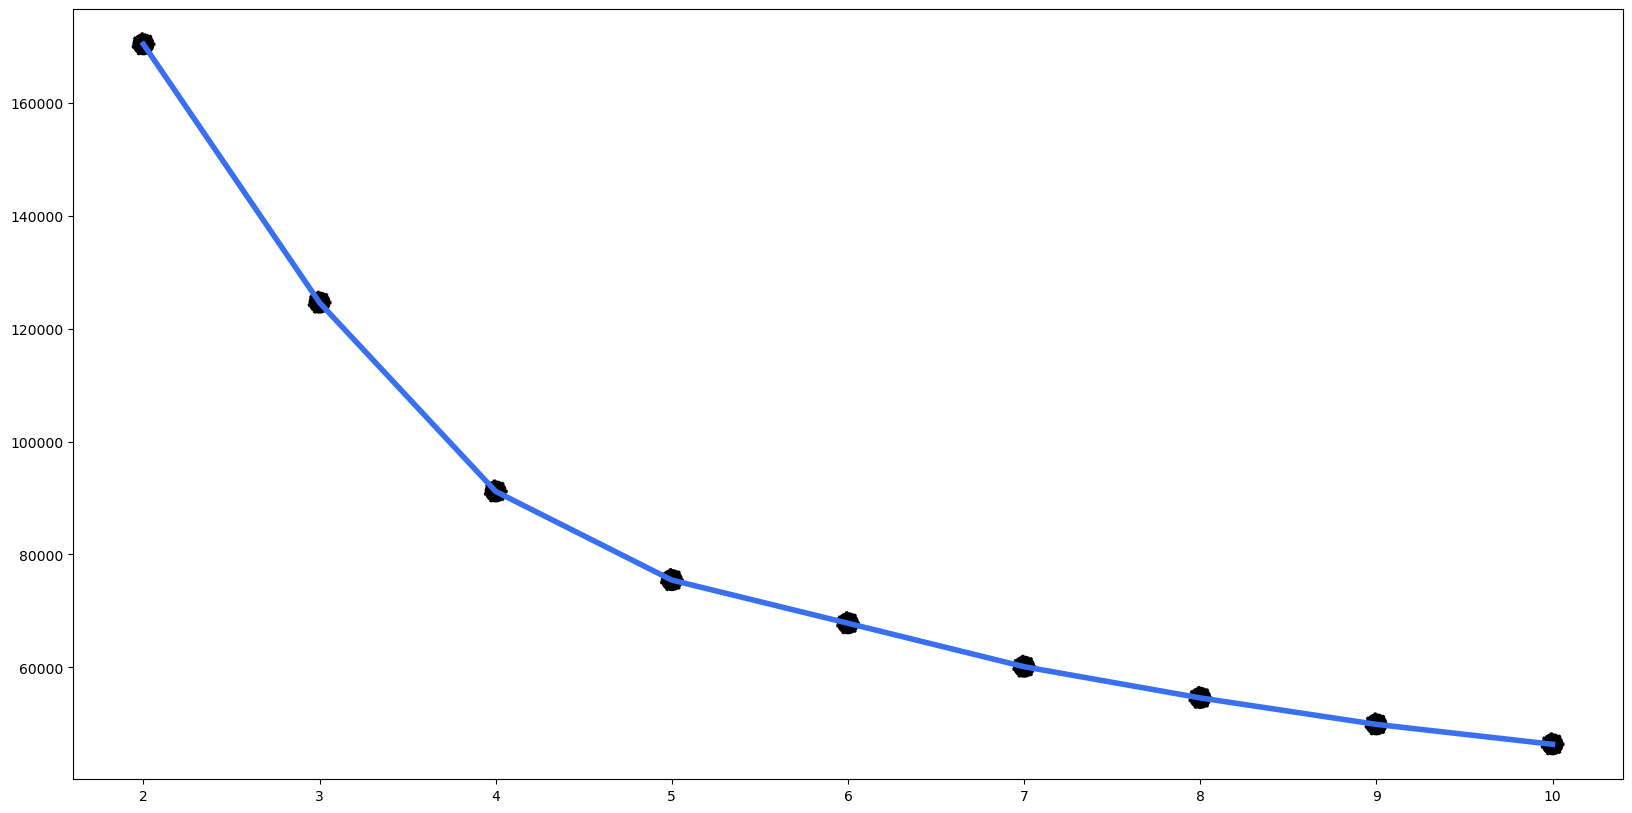

In [4]:
plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#3970F1', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='black',  linestyle='--')

**Observasi:**
- Menggunakan Inertia untuk melakukan modeling clustering dengan K-means
- Parameter yang kami gunakan seperti n_cluster = 10 dan random state = 0

### Silhouette_Score

In [5]:
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [6]:
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(data)
    preds = kmeans.predict(data)

    score_euclidean = silhouette_score(data, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

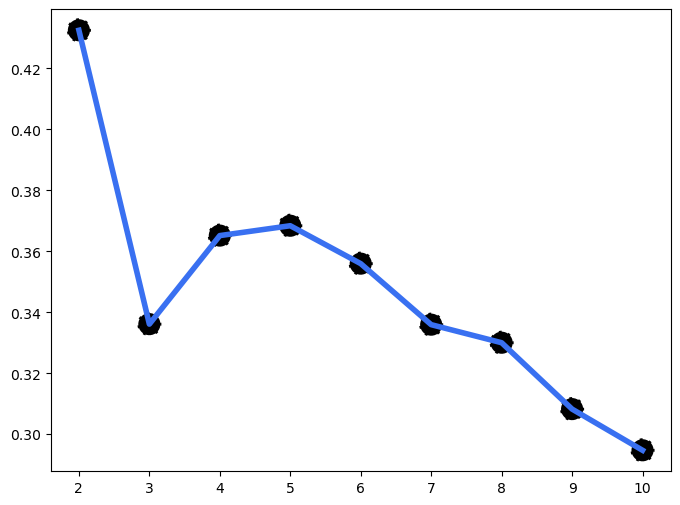

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#3970F1', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='black',  linestyle='--')
plt.show()

**Observasi:**
- Menggunakan Silhouette_Score untuk melakukan modeling clustering dengan K-means
- Parameter yang kami gunakan seperti n_cluster dengan range 2 hingga 10

In [8]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(data.values)

KMeans(n_clusters=4, random_state=0)

In [9]:
clusters = kmeans.labels_

In [10]:
data['clusters'] = clusters

In [11]:
data.head()

,MEMBER_DURATION,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,clusters
0,1.449656,-0.952089,14.097127,26.873334,0
1,1.308022,-0.919377,9.116951,13.186263,0
2,1.343430,-0.897568,8.761224,12.711047,0
3,0.670670,-0.428687,0.792942,12.597751,0
4,0.387403,-0.930281,9.970695,13.961122,0


In [12]:
pca = PCA(n_components=2)

pca.fit(data)
pcs = pca.transform(data)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])

data_pca.head()

,PC 1,PC 2
0,26.797849,4.544272
1,15.003538,2.547798
2,14.477309,2.448397
3,9.054764,2.254701
4,15.876861,3.221644


In [13]:
data_pca['clusters'] = clusters
data_pca.head()

,PC 1,PC 2,clusters
0,26.797849,4.544272,0
1,15.003538,2.547798,0
2,14.477309,2.448397,0
3,9.054764,2.254701,0
4,15.876861,3.221644,0


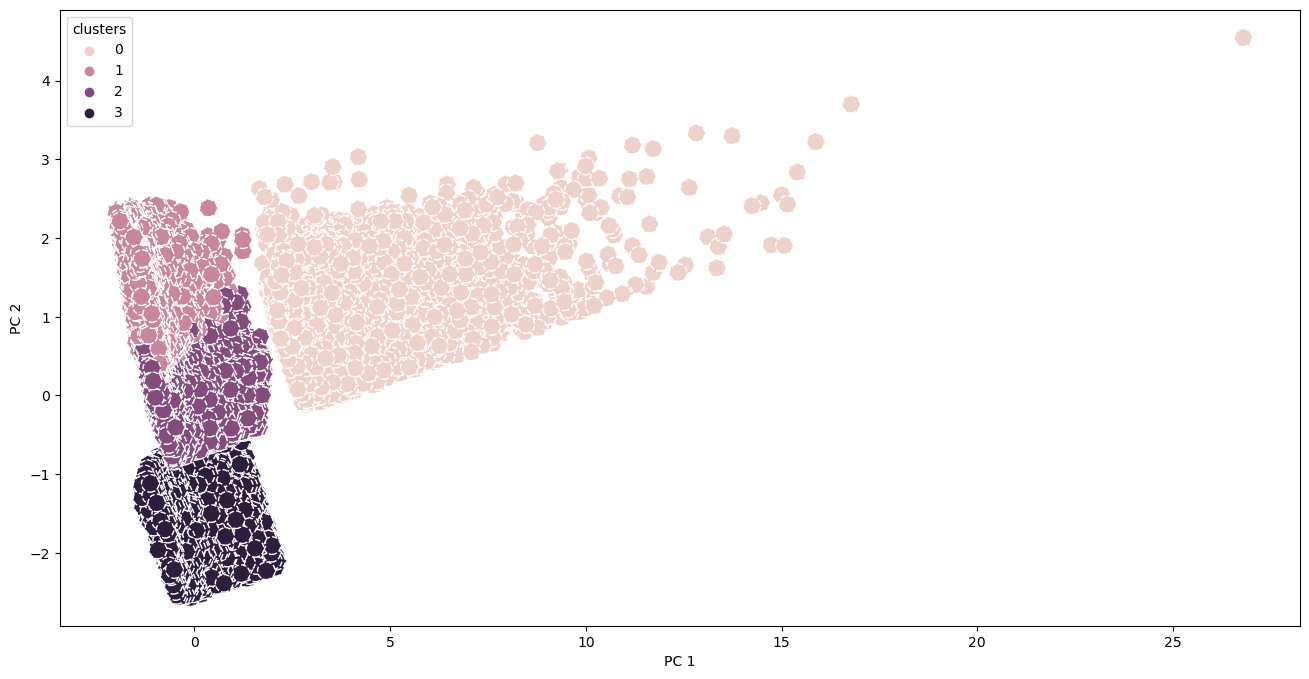

In [14]:
fig, ax = plt.subplots(figsize=(16,8))

sns.scatterplot(
    x='PC 1', y='PC 2',
    hue='clusters',
    linestyle='--',
    data=data_pca,
    s=160,
    ax=ax
)

plt.show()

**Observasi:**
*   Terdapat dua kelompok utama dari pelanggan, yaitu kelompok pelanggan aktif dan kelompok pelanggan pasif.
- Kelompok pelanggan aktif adalah kelompok yang memiliki durasi keanggotaan yang lama, sisa masa keanggotaan yang pendek, jumlah penerbangan yang banyak, dan total jarak yang ditempuh yang jauh.
- Kelompok pelanggan pasif adalah kelompok yang memiliki durasi keanggotaan yang pendek, sisa masa keanggotaan yang panjang, jumlah penerbangan yang sedikit, dan total jarak yang ditempuh yang dekat.
- Analisis komponen utama (PCA) dapat digunakan untuk mengurangi dimensi data dan untuk membedakan antara kelompok pelanggan aktif dan kelompok pelanggan pasif.


### Result Model

In [15]:
data_pca['clusters'] = clusters
data_pca.sample(10)

,PC 1,PC 2,clusters
24483,-0.164649,0.477533,2
25681,0.097290,-1.396881,3
41701,-1.280142,1.790421,1
18701,-0.029437,-1.828248,3
59776,-0.880449,-1.481622,3
11472,1.666261,-1.654966,3
32708,-0.813183,-1.179437,3
51559,-0.837572,0.085883,2
22590,0.379557,0.367853,2
3300,3.395850,1.226178,0


**Observasi:**

Berdasarkan statistik fitur, berikut adalah deskripsi customer seperti apa yang ada di masing-masing cluster:

- Cluster 0: Customer yang sudah menjadi pelanggan dalam waktu yang lama, namun aktivitas penerbangannya sudah menurun.
- Cluster 1: Customer yang baru menjadi pelanggan, namun memiliki aktivitas penerbangan yang tinggi.
- Cluster 2: Customer yang aktivitas penerbangannya biasa-biasa saja.
- Cluster 3: Customer yang aktivitas penerbangannya menurun.

# Business Recomendation

- Cluster 0 = Maskapai perlu fokus untuk mempertahankan loyalitas customer yang sudah lama menjadi anggota.
- Cluster 1 = Maskapai perlu fokus untuk menarik customer baru dan mendorong mereka untuk terbang lebih sering dengan memberikan penawaran yang menarik seperti poin atau diskon.
- Cluster 2 = Maskapai perlu fokus untuk meningkatkan aktivitas penerbangan customer dengan memberikan pelayanan yang berkualitas.
- Cluster 3 = Maskapai perlu fokus untuk mempertahankan loyalitas customer yang aktivitas penerbangannya menurun dengan memberikan penawaran menarik seperti poin dan diskon.
